In [1]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import datetime
from shapely import wkb
import osmnx as ox
from haversine import haversine, Unit
import glob
import os
import subprocess

In [2]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import time
import numpy as np
import seaborn as sn
import datetime
from shapely import wkb
import osmnx as ox
from haversine import haversine, Unit
import glob
import os

In [11]:
trajs = gp.read_file('./data/trajectories/trajs.shp')
# trajs.set_index('id', drop=True, inplace=True)

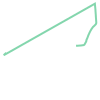

In [26]:
trajs.iloc[909].geometry

In [10]:
trajs[:5]

,altitude,bearing,speed,geometry
id,,,,
0,"1252.4562,1252.6202,1252.6537","187.59666,181.9601,181.9601","2.1024263,5.2562995,5.3194246","LINESTRING (51.41109 35.71721, 51.41107 35.716..."
2,"1245.478,1245.4548,1245.4868","179.75314,257.93805,257.93805","3.3847504,4.5378594,4.6105237","LINESTRING (51.41106 35.71597, 51.41061 35.715..."
3,"1245.8268,1245.9038,1245.8993,1245.8813,1245.8...","218.3626,218.3626,222.43776,224.90073,236.6357...","3.9473643,6.854749,10.204028,13.40223,14.21600...","LINESTRING (51.41066 35.71312, 51.41056 35.713..."
4,"1485.8624,1485.7007,1485.6643,1485.6608,1485.6...","166.90115,166.90115,166.90115,166.90115,149.71...","7.8039165,5.8857727,5.0338764,5.239082,7.26724...","LINESTRING (51.42501 35.72338, 51.42514 35.722..."
5,"1485.7754,1485.8458,1485.922,1485.9274,1485.95...","187.28563,195.14821,224.69406,249.81958,264.96...","12.975585,12.524187,10.691293,9.700655,9.69669...","LINESTRING (51.42637 35.71634, 51.42628 35.716..."


In [12]:
trajs

,id,altitude,bearing,speed,geometry
0,0,"1252.4562,1252.6202,1252.6537","187.59666,181.9601,181.9601","2.1024263,5.2562995,5.3194246","LINESTRING (51.41109 35.71721, 51.41107 35.716..."
1,2,"1245.478,1245.4548,1245.4868","179.75314,257.93805,257.93805","3.3847504,4.5378594,4.6105237","LINESTRING (51.41106 35.71597, 51.41061 35.715..."
2,3,"1245.8268,1245.9038,1245.8993,1245.8813,1245.8...","218.3626,218.3626,222.43776,224.90073,236.6357...","3.9473643,6.854749,10.204028,13.40223,14.21600...","LINESTRING (51.41066 35.71312, 51.41056 35.713..."
3,4,"1485.8624,1485.7007,1485.6643,1485.6608,1485.6...","166.90115,166.90115,166.90115,166.90115,149.71...","7.8039165,5.8857727,5.0338764,5.239082,7.26724...","LINESTRING (51.42501 35.72338, 51.42514 35.722..."
4,5,"1485.7754,1485.8458,1485.922,1485.9274,1485.95...","187.28563,195.14821,224.69406,249.81958,264.96...","12.975585,12.524187,10.691293,9.700655,9.69669...","LINESTRING (51.42637 35.71634, 51.42628 35.716..."
...,...,...,...,...,...
374138,485477,"1232.7904,1235.1908,1238.2499,1237.6967,1234.8...","261.82568,280.12546,296.50925,281.259,87.69954...","6.985921,6.7200627,7.158441,4.6690273,14.98696...","LINESTRING (51.40804 35.71184, 51.40762 35.711..."
374139,485478,"1234.86,1234.86,1234.86,1234.86,1234.86,1234.8...","27.63592,27.63592,18.728512,18.728512,18.78287...","1.7910929,1.8157991,9.643889,10.173544,11.3217...","LINESTRING (51.42632 35.71564, 51.42637 35.715..."
374140,485479,"1234.86,1234.86,1234.86,1234.86,1234.86","19.524782,19.524782,19.524782,19.524782,12.491037","15.912775,13.065108,6.067937,5.593368,1.9863683","LINESTRING (51.42725 35.71800, 51.42736 35.718..."
374141,485482,"1523.5726,1523.5448,1523.408,1523.3634","141.89229,141.89229,141.89229,154.80382","11.542544,11.607377,12.64499,10.502441","LINESTRING (51.42599 35.72156, 51.42615 35.721..."


In [2]:
def convert_location(x):
    point = wkb.loads(x, hex=True)
    return point.x, point.y

In [3]:
with open('./new-old-version/utils/bounding_box.txt', 'r') as bbx_file:
    north, south, east, west = [float(line.strip('\n').split('=')[1]) for line in bbx_file]

boundary = dict(
    east=east,
    west=west,
    north=north,
    south=south
)

In [4]:
all_df = pd.read_parquet('./loc_sample/teh_uni_loc_sample/')

In [6]:
all_df = all_df[:1000000]

In [7]:
all_df.location = all_df.location.apply(lambda x: convert_location(x))
all_df['longitude'] = all_df.location.apply(lambda x: x[0])
all_df['latitude'] = all_df.location.apply(lambda x: x[1])

/home/peyman/anaconda3/envs/conda_env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-7-3245155518bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['longitude'] = all_df.location.apply(lambda x: x[0])
<ipython-input-7-3245155518bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [8]:
all_df['in_bound'] = all_df.location.apply(
    lambda x: boundary['west'] < x[0] < boundary['east'] and boundary['south'] < x[1] < boundary['north']
)
all_df = all_df[all_df.in_bound == True]

<ipython-input-8-53baf289df3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['in_bound'] = all_df.location.apply(


In [9]:
all_df.timestamp = all_df.timestamp.apply(
    lambda x: datetime.datetime.fromtimestamp(int(x) / 1000)
)
all_df.receive_timestamp = all_df.receive_timestamp.apply(
    lambda x: datetime.datetime.fromtimestamp(int(x) / 1000)
)

In [10]:
all_df.reset_index(drop=True, inplace=True)

In [11]:
all_df = all_df[
    ['route_slug', 'latitude', 'longitude', 'altitude', 'timestamp', 'bearing', 'speed']
]

In [ ]:
def read_large_size(dir_path, boundary, has_distance=True):
    all_df = []
    for file_name in sorted(os.listdir(dir_path)):
        if not file_name.endswith('.parquet'):
            continue
        file_path = os.path.join(dir_path, file_name)
        print(file_path)
        inbound_df = pd.read_parquet(file_path)
        inbound_df.location = inbound_df.location.apply(lambda x: convert_location(x))
        inbound_df['longitude'] = inbound_df.location.apply(lambda x: x[0])
        inbound_df['latitude'] = inbound_df.location.apply(lambda x: x[1])
        inbound_df['in_bound'] = inbound_df.location.apply(
            lambda x: boundary['west'] < x[0] < boundary['east'] and boundary['south'] < x[1] < boundary['north']
        )
        inbound_df = inbound_df[inbound_df.in_bound == True]
        if has_distance:
            inbound_df = inbound_df[
                ['route_slug', 'latitude', 'longitude', 'altitude', 'timestamp', 'bearing', 'speed',
                 'distance']
            ]
        else:
            inbound_df = inbound_df[
                ['route_slug', 'latitude', 'longitude', 'altitude', 'timestamp', 'bearing', 'speed']
            ]
        all_df.append(inbound_df)
    all_df = pd.concat(all_df, ignore_index=True)
    return all_df


def read_small_size(dir_path, boundary, has_distance=True):
    all_df = pd.read_parquet(dir_path)
    all_df.location = all_df.location.apply(lambda x: convert_location(x))
    all_df['longitude'] = all_df.location.apply(lambda x: x[0])
    all_df['latitude'] = all_df.location.apply(lambda x: x[1])
    all_df['in_bound'] = all_df.location.apply(
        lambda x: boundary['west'] < x[0] < boundary['east'] and boundary['south'] < x[1] < boundary['north']
    )
    all_df = all_df[all_df.in_bound == True]
    if has_distance:
        all_df = all_df[
            ['route_slug', 'latitude', 'longitude', 'altitude', 'timestamp', 'bearing', 'speed',
             'distance']
        ]
    else:
        all_df = all_df[
            ['route_slug', 'latitude', 'longitude', 'altitude', 'timestamp', 'bearing', 'speed']
        ]
    return all_df


def load_directory(
        dir_path, boundary,
        output_dir, shape_path,
        has_distance=True,
        min_dist_threshold=5,
        max_dist_threshold=170,
        max_time_threshold=20,
        max_spd_threshold=26,
        split_threshold=100000,
        large_size=False
):
    if large_size:
        print('loading from large size method')
        all_df = read_large_size(dir_path, boundary, has_distance)
    else:
        print('loading from small size method')
        all_df = read_small_size(dir_path, boundary, has_distance)
    all_df.timestamp = all_df.timestamp.apply(
        lambda x: datetime.datetime.fromtimestamp(int(x) / 1000)
    )
    all_df.sort_values(by=['route_slug', 'timestamp'], inplace=True)
#     all_df['pre_idx'] = all_df.index
#     all_df['pre_idx'] = all_df.pre_idx.shift(1)
    all_df['pre_route_slug'] = all_df.route_slug.shift(1)
#     all_df = all_df[1:]
#     all_df['pr_time'] = all_df.timestamp.shift(1)
#     all_df['delta_time'] = all_df[['timestamp', 'pr_time']].apply(
#         lambda x: (x.timestamp - x.pr_time).seconds, axis=1
#     )
#     all_df.pre_idx = all_df.pre_idx.astype('int32')
    all_df['ntraj_points'] = 0
    all_df['route_id'] = 0
    all_df['pr_time'] = all_df.timestamp.shift(1)
    all_df = all_df[1:]
    all_df['delta_time'] = all_df[['timestamp', 'pr_time']].apply(
        lambda x: (x.timestamp - x.pr_time).seconds, axis=1
    )
    if has_distance:
        all_df['pr_distance'] = all_df.distance.shift(1)
        all_df = all_df[1:]
        all_df['delta_dist'] = all_df[['distance', 'pr_distance']].apply(
            lambda x: x.distance - x.pr_distance, axis=1
        )
    else:
        all_df['pr_latitude'] = all_df.latitude.shift(1)
        all_df['pr_longitude'] = all_df.longitude.shift(1)
        all_df = all_df[1:]
        all_df['delta_dist'] = all_df[
            ['latitude', 'longitude', 'pr_latitude', 'pr_longitude']
        ].apply(
            lambda x: haversine(
                (x.latitude, x.longitude),
                (x.pr_latitude, x.pr_longitude),
                unit=Unit.METERS
            ), axis=1
        )
    all_df['avg_speed'] = all_df[['delta_dist', 'delta_time']].apply(
        lambda x: x.delta_dist / max(x.delta_time, 1), axis=1
    )
    print(len(all_df))

    all_df = all_df[all_df.delta_dist > min_dist_threshold]
    last_route_id = 0
    first, last = 0, 0
    all_df.reset_index(drop=True, inplace=True)
#     for i in range(1, len(all_df)):
    for index, row in all_df.iterrows():

#         previous = all_df.iloc[i - 1]
#         current = all_df.iloc[i]

#         if any([
#             current['route_slug'] != previous['route_slug'],
#             current['delta_time'] > max_time_threshold,
#             current['avg_speed'] > max_spd_threshold,
#             current['delta_dist'] > max_dist_threshold
#         ]):
        if any([
            row['route_slug'] != row['pre_route_slug'],
            row['delta_time'] > max_time_threshold,
            row['avg_speed'] > max_spd_threshold,
            row['delta_dist'] > max_dist_threshold
        ]):
#             last = i
            last = index
            all_df.iloc[first:last]['ntraj_points'] = last - first
            all_df.iloc[first:last]['route_id'] = last_route_id
            last_route_id += 1
#             first = i
            first = index
    all_df = all_df[all_df.ntraj_points > 1]
    print(len(all_df))
    all_df = all_df[
        [
            'route_id',
            'longitude',
            'latitude',
            'altitude',
            'timestamp',
            'bearing',
            'speed'
        ]
    ]
    idxs = all_df.route_id.unique()
    split_parts = int(len(all_df) / min(split_threshold, len(all_df)))
    splitted_idxs = np.array_split(idxs, split_parts)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for arr in splitted_idxs:
        file_name = os.path.join(output_dir, f'{arr[0]}-{arr[-1]}.csv')
        all_df[all_df.route_id.isin(arr)].to_csv(file_name, sep=',', header=True, index=False)

    trajs_list = []
    list2str = lambda x: ','.join([str(y) for y in x])
    for idx in idxs:
        idx_df = all_df[all_df.route_id == idx]
        traj_list = list(zip(idx_df.longitude.values, idx_df.latitude.values))
        trajs_list.append(
            (idx, LineString(traj_list), list2str(idx_df.altitude.tolist()),
             list2str(idx_df.bearing.tolist()), list2str(idx_df.speed.tolist()))
        )
    df = pd.DataFrame(trajs_list, columns=['id', 'geometry', 'altitude', 'bearing', 'speed'])
    df = gp.GeoDataFrame(df, geometry='geometry')
    df.to_file(shape_path, driver='ESRI Shapefile')
    return all_df

In [ ]:
_ = load_directory(
    dir_path=args.data_directory,
    boundary=boundary,
    output_dir=args.csv_output_directory,
    shape_path=args.shape_output_directory,
    has_distance=has_distance,
    large_size=large_size_files
)

In [ ]:
python traj_generator.py --bounding_box_path ./utils/bounding_box.txt --data_directory ./data/gps-data/ --csv_output_directory ./data/gps-csv/ --shape_output_directory ./data/trajectories/trajs.shp --from_directory True --has_distance True

In [12]:
all_df.sort_values(by=['route_slug', 'timestamp'], inplace=True)

In [13]:
all_df['pr_time'] = all_df.timestamp.shift(1)
all_df['pre_idx'] = all_df.index
all_df['pre_idx'] = all_df.pre_idx.shift(1)
all_df['pre_route_slug'] = all_df.route_slug.shift(1)
all_df = all_df[1:]
all_df['delta_time'] = all_df[['timestamp', 'pr_time']].apply(
    lambda x: (x.timestamp - x.pr_time).seconds, axis=1
)
all_df.pre_idx = all_df.pre_idx.astype('int32')

In [12]:
id_changes = []
route_id_changes = []
start = time.time()

for index, row in all_df.iterrows():
    
    if index != row['pre_idx']+1:
        id_changes.append(index)
    
    if row['route_slug'] != row['pre_route_slug']:
        route_id_changes.append(index)

end = time.time()
change_list = [i for i in id_changes if i not in route_id_changes]

In [29]:
all_df[all_df.delta_time.between(10, 20)][['route_slug', 'delta_time']][:60]

,route_slug,delta_time
3675460,00008b27-d10d-4768-91b7-28a1c1775c81,10
3675512,00008b27-d10d-4768-91b7-28a1c1775c81,11
3675611,00008b27-d10d-4768-91b7-28a1c1775c81,19
3675982,00008b27-d10d-4768-91b7-28a1c1775c81,10
1930947,0000dfc5-bb64-4cf4-ae3f-832e1fad301d,20
1930999,0000dfc5-bb64-4cf4-ae3f-832e1fad301d,13
3859855,0002479e-284c-4dbc-8156-9c1a13c99627,12
3860082,0002479e-284c-4dbc-8156-9c1a13c99627,18
3860189,0002479e-284c-4dbc-8156-9c1a13c99627,12
3860416,0002479e-284c-4dbc-8156-9c1a13c99627,12


In [37]:
all_df[all_df.delta_time.between(10, 20)][['route_slug', 'delta_time']][:60]

,route_slug,delta_time
3675460,00008b27-d10d-4768-91b7-28a1c1775c81,10
3675512,00008b27-d10d-4768-91b7-28a1c1775c81,11
3675611,00008b27-d10d-4768-91b7-28a1c1775c81,19
3675982,00008b27-d10d-4768-91b7-28a1c1775c81,10
1930947,0000dfc5-bb64-4cf4-ae3f-832e1fad301d,20
1930999,0000dfc5-bb64-4cf4-ae3f-832e1fad301d,13
3859855,0002479e-284c-4dbc-8156-9c1a13c99627,12
3860082,0002479e-284c-4dbc-8156-9c1a13c99627,18
3860189,0002479e-284c-4dbc-8156-9c1a13c99627,12
3860416,0002479e-284c-4dbc-8156-9c1a13c99627,12


In [14]:
from copy import deepcopy

In [15]:
new_df = deepcopy(all_df)

In [16]:
new_df = all_df.sort_index()

In [17]:
new_df['pr_time'] = new_df.timestamp.shift(1)
new_df['pre_idx'] = new_df.index
new_df['pre_idx'] = new_df.pre_idx.shift(1)
new_df['pre_route_slug'] = new_df.route_slug.shift(1)
new_df = new_df[1:]
new_df['delta_time'] = new_df[['timestamp', 'pr_time']].apply(
    lambda x: (x.timestamp - x.pr_time).seconds, axis=1
)
new_df.pre_idx = new_df.pre_idx.astype('int32')

In [37]:
before_count = {}
after_count = {}
for i in range(0, 40, 10):
    before_count[(i, i+10)] = len(new_df[new_df.delta_time.between(i, i+10)])
    after_count[(i, i+10)] = len(all_df[all_df.delta_time.between(i, i+10)])

In [33]:
print(before_count)
print(after_count)

{(0, 2): 321771, (2, 4): 429331, (4, 6): 115348, (6, 8): 81881, (8, 10): 67940, (10, 12): 41303, (12, 14): 33827, (14, 16): 29289, (16, 18): 35870, (18, 20): 22360, (20, 22): 1461, (22, 24): 937, (24, 26): 805, (26, 28): 643, (28, 30): 613, (30, 32): 499, (32, 34): 450, (34, 36): 449, (36, 38): 433, (38, 40): 408}
{(0, 2): 510280, (2, 4): 515160, (4, 6): 123766, (6, 8): 86673, (8, 10): 73816, (10, 12): 46921, (12, 14): 36808, (14, 16): 33495, (16, 18): 40524, (18, 20): 28926, (20, 22): 6204, (22, 24): 2889, (24, 26): 2367, (26, 28): 1987, (28, 30): 1830, (30, 32): 1521, (32, 34): 1298, (34, 36): 1149, (36, 38): 1144, (38, 40): 989}


In [36]:
print(before_count)
print(after_count)

{(0, 5): 492816, (5, 10): 170242, (10, 15): 72549, (15, 20): 55239, (20, 25): 2342, (25, 30): 1315, (30, 35): 944, (35, 40): 865}
{(0, 5): 703303, (5, 10): 182076, (10, 15): 81192, (15, 20): 66435, (20, 25): 8766, (25, 30): 4015, (30, 35): 2740, (35, 40): 2101}


In [38]:
print(before_count)
print(after_count)

{(0, 10): 615110, (10, 20): 116941, (20, 30): 3393, (30, 40): 1657}
{(0, 10): 834750, (10, 20): 135557, (20, 30): 11928, (30, 40): 4459}


In [41]:
print(len(new_df[new_df.delta_time > 100]))
print(len(all_df[all_df.delta_time > 100]))

275636
34782


In [43]:
all_df.shift(1)

,route_slug,latitude,longitude,altitude,timestamp,bearing,speed,pr_time,pre_idx,pre_route_slug,delta_time
511877,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
511924,00022431-ac1d-476b-b32e-d15da8eb488b,35.719166,51.430750,1250.6276,2021-03-01 17:15:04.884,31.953491,7.517394,2021-03-01 17:15:02.831,511876.0,00022431-ac1d-476b-b32e-d15da8eb488b,2.0
511925,00022431-ac1d-476b-b32e-d15da8eb488b,35.719230,51.430800,1250.6276,2021-03-01 17:15:05.861,31.953491,7.764250,2021-03-01 17:15:04.884,511877.0,00022431-ac1d-476b-b32e-d15da8eb488b,0.0
511926,00022431-ac1d-476b-b32e-d15da8eb488b,35.719470,51.430960,1250.6276,2021-03-01 17:15:08.827,27.850996,8.697072,2021-03-01 17:15:05.861,511924.0,00022431-ac1d-476b-b32e-d15da8eb488b,2.0
328257,00022431-ac1d-476b-b32e-d15da8eb488b,35.719830,51.431194,1250.6276,2021-03-01 17:15:13.836,27.850996,9.357444,2021-03-01 17:15:08.827,511925.0,00022431-ac1d-476b-b32e-d15da8eb488b,5.0
...,...,...,...,...,...,...,...,...,...,...,...
928014,fffe11f9-33b2-4d8d-a36e-39b7e7de8a2b,35.721027,51.426640,1226.7272,2021-02-28 12:53:22.574,329.959560,14.511601,2021-02-28 12:53:19.583,927999.0,fffe11f9-33b2-4d8d-a36e-39b7e7de8a2b,2.0
928015,fffe11f9-33b2-4d8d-a36e-39b7e7de8a2b,35.721250,51.426426,1226.7032,2021-02-28 12:53:24.585,320.263520,15.266887,2021-02-28 12:53:22.574,928000.0,fffe11f9-33b2-4d8d-a36e-39b7e7de8a2b,2.0
928016,fffe11f9-33b2-4d8d-a36e-39b7e7de8a2b,35.721580,51.426094,1226.6349,2021-02-28 12:53:27.590,320.897460,15.729710,2021-02-28 12:53:24.585,928014.0,fffe11f9-33b2-4d8d-a36e-39b7e7de8a2b,3.0
928017,fffe11f9-33b2-4d8d-a36e-39b7e7de8a2b,35.721970,51.425760,1226.6877,2021-02-28 12:53:30.589,325.851040,16.894722,2021-02-28 12:53:27.590,928015.0,fffe11f9-33b2-4d8d-a36e-39b7e7de8a2b,2.0


In [44]:
all_df

,route_slug,latitude,longitude,altitude,timestamp,bearing,speed,pr_time,pre_idx,pre_route_slug,delta_time
511877,00022431-ac1d-476b-b32e-d15da8eb488b,35.719166,51.430750,1250.6276,2021-03-01 17:15:04.884,31.953491,7.517394,2021-03-01 17:15:02.831,511876,00022431-ac1d-476b-b32e-d15da8eb488b,2
511924,00022431-ac1d-476b-b32e-d15da8eb488b,35.719230,51.430800,1250.6276,2021-03-01 17:15:05.861,31.953491,7.764250,2021-03-01 17:15:04.884,511877,00022431-ac1d-476b-b32e-d15da8eb488b,0
511925,00022431-ac1d-476b-b32e-d15da8eb488b,35.719470,51.430960,1250.6276,2021-03-01 17:15:08.827,27.850996,8.697072,2021-03-01 17:15:05.861,511924,00022431-ac1d-476b-b32e-d15da8eb488b,2
511926,00022431-ac1d-476b-b32e-d15da8eb488b,35.719830,51.431194,1250.6276,2021-03-01 17:15:13.836,27.850996,9.357444,2021-03-01 17:15:08.827,511925,00022431-ac1d-476b-b32e-d15da8eb488b,5
328257,0005d27b-b1d4-4b91-9a57-bac68735a0b2,35.712610,51.431065,1233.5440,2021-03-01 14:24:16.827,282.755370,4.097893,2021-03-01 17:15:13.836,511926,00022431-ac1d-476b-b32e-d15da8eb488b,76142
...,...,...,...,...,...,...,...,...,...,...,...
928014,fffe11f9-33b2-4d8d-a36e-39b7e7de8a2b,35.721250,51.426426,1226.7032,2021-02-28 12:53:24.585,320.263520,15.266887,2021-02-28 12:53:22.574,928000,fffe11f9-33b2-4d8d-a36e-39b7e7de8a2b,2
928015,fffe11f9-33b2-4d8d-a36e-39b7e7de8a2b,35.721580,51.426094,1226.6349,2021-02-28 12:53:27.590,320.897460,15.729710,2021-02-28 12:53:24.585,928014,fffe11f9-33b2-4d8d-a36e-39b7e7de8a2b,3
928016,fffe11f9-33b2-4d8d-a36e-39b7e7de8a2b,35.721970,51.425760,1226.6877,2021-02-28 12:53:30.589,325.851040,16.894722,2021-02-28 12:53:27.590,928015,fffe11f9-33b2-4d8d-a36e-39b7e7de8a2b,2
928017,fffe11f9-33b2-4d8d-a36e-39b7e7de8a2b,35.722300,51.425480,1226.7158,2021-02-28 12:53:33.589,325.868680,15.488542,2021-02-28 12:53:30.589,928016,fffe11f9-33b2-4d8d-a36e-39b7e7de8a2b,3
